# Tareas de SPSI

**David Cabezas Berrido y Patricia Córdoba Hidalgo**

In [1]:
from math import sqrt
from scipy.stats import gmean
from statistics import harmonic_mean
import numpy as np
import unicodedata
import random
import string
from collections import Counter
import matplotlib.pyplot as plt

# Tarea 2: Criptosistema de Vigenère

In [2]:
def normalize(c):
    return unicodedata.normalize("NFD",c)[0]

def encode(cadena):
    cadena=cadena.upper().replace('Ñ','GN')
    cadena=''.join(normalize(c) for c in cadena if c.isalnum())
    return cadena

Con motivos puramente didácticos, implementamos un sistema de generación aleatoria de claves de la longitud del mensaje.

Si no se introduce clave en el constructor, se utilizará este método la primera vez que se intente cifrar.

Utiliza la asociatividad de la suma en módulo para generar una clave que se repite cada 2, luego cada 2*3, luego cada 2*3*5 y así hasta tener suficientes números primos para alcanzar la longitud del mensaje.

In [3]:
# Clase de los números primos para, utilizando la asociatividad de la suma en módulo,
# generar claves aleatorias indefinidamente largas
def primes():
    current = 1
    while True:
        current += 1
        while True:
            for i in range(2, current // 2 + 1):
                if current % i == 0:
                    current += 1
                    break
            else:
                break
        yield current

In [4]:
class Vigenere:
        
    def __init__(self,alphabet,key=None,keyLen=None):
        self.A=alphabet
        self.n=len(alphabet)
        
        # Diccionarios con los valores correspondientes a cada caracter
        self.value=dict(zip(self.A,range(self.n)))
        self.character={v:k for k,v in self.value.items()}
        
        # Si no se proporciona una clave ni longitud se generará una aleatoria cuando se intente cifrar por primera vez
        self.key=key
        
        if key==None and keyLen:
            self.key=self.generateRandomKey(keyLen)
        
            
    # Generación de claves aleatorias arbitrariamente largas combinando varias claves de longitud primo
    def generateSmallRandomKey(self,keyLen):
        return ''.join(random.choice(self.A) for _ in range(keyLen))
    
    def generateRandomKey(self,keyLen):
        prim=primes()
        p=next(prim) # Partimos de una clave de longitud 2
        prod=p
        smallKey=self.generateSmallRandomKey(p)
        key=self.keyToLength(smallKey,keyLen) # Clave de longitud deseada, que se repite cada 2
        while prod < keyLen:
            print(key) # Esto no debe imprimirse, pero ayuda a comprender la generación de la clave
            p=next(prim)
            smallKey=self.generateSmallRandomKey(p)
            self.key=self.keyToLength(smallKey,keyLen) # Ciframos la clave "acumulada" con la nueva clave generada
            key=self.cipher(key) # Ahora tenemos una clave que se repite cada prod
            prod*=p
        return key
            
    # Obtener el valor de una letra 
    def getValue(self,c):
        return self.value[c]
    
    # Obtener un letra a partir del valor 
    def getCharacter(self,v):
        return self.character[v]
        
    # Repite la clave hasta longitud length
    def keyToLength(self, key, length):
        return (key * (int(length/len(key))+1))[:length]
            
    # Función de cifrado
    def cipher(self,msg):
        if self.key==None:
            self.key=self.generateRandomKey(len(msg))
            
        k=self.keyToLength(self.key,len(msg))
        
        # Cambiamos las letras por su valor correspondiente
        msg_values=list(map(self.getValue,msg))
        key_values=list(map(self.getValue,k))
        
        # Sumamos módulo la longitud del diccionario
        result=[(msg_values[i]+key_values[i])%self.n for i in range(len(msg))]
        
        # Volvemos a convertir en caracteres y devolvemos el mensaje cifrado
        return ''.join((map(self.getCharacter,result)))
        
    # Función de descifrado
    def decipher(self, msg):
        k=self.keyToLength(self.key,len(msg))
        
        # Cambiamos las letras por su valor correspondiente
        msg_values=list(map(self.getValue,msg))
        key_values=list(map(self.getValue,k))
        
        # Restamos módulo la longitud del diccionario
        result=[(msg_values[i]-key_values[i])%self.n for i in range(len(msg))]
        
        # Volvemos a convertir en caracteres y devolvemos el mensaje descifrado
        return ''.join((map(self.getCharacter,result)))

In [5]:
alphabet=string.ascii_uppercase+string.digits

In [6]:
#vig = Vigenere(alphabet,'CLAVEMUYSECRETA')
vig = Vigenere(alphabet)

In [7]:
msg=encode('el secreto se protege a sí mismo. Mi constraseña del WI-FI es 123456')
msg

'ELSECRETOSEPROTEGEASIMISMOMICONSTRASEGNADELWIFIES123456'

In [8]:
cifrado=vig.cipher(msg) # Si no está comentado el print, se observa la generación de la clave
cifrado

CGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGCGC
O0ZSW3O0ZSW3O0ZSW3O0ZSW3O0ZSW3O0ZSW3O0ZSW3O0ZSW3O0ZSW3O
OPTXI3DU4EWSI5LSLXTMZHQ8A0OM1POPTXI3DU4EWSI5LSLXTMZHQ8A


'KFZG4C05XKFRR2WBFGDWQLDE1YSDVIPMW61DWOWYRFL6HCDTU56YZNY'

In [9]:
vig.key

'G4HC2VWMJ2BCAOD79CDEI95WPKG5T4C4DP1VSIJYOBAK975PCEE55S2'

In [10]:
vig.decipher(cifrado)

'ELSECRETOSEPROTEGEASIMISMOMICONSTRASEGNADELWIFIES123456'

# Tareas 3 y 4: Rompiendo el criptosistema de Vigenère

Vamos a poner un ejemplo del ataque al criptosistema de Vigenère usando el texto del ejercicio 4.
El ataque se basa en la obtención de la clave por el siguiente procedimiento:
- Primero se averigua su longitud, TODO
Nos aprovechamos de que la clave se repite hasta ocupar la longitud del texto a cifrar
https://github.com/ichantzaras/creamcrackerz

In [11]:
text="""UECWKDVLOTTVACKTPVGEZQMDAMRNPDDUXLBUICAMRHOECBHSPQLVIWO
FFEAILPNTESMLDRUURIFAEQTTPXADWIAWLACCRPBHSRZIVQWOFROGTT
NNXEVIVIBPDTTGAHVIACLAYKGJIEQHGECMESNNOCTHSGGNVWTQHKBPR
HMVUOYWLIAFIRIGDBOEBQLIGWARQHNLOISQKEPEIDVXXNETPAXNZGDX
WWEYQCTIGONNGJVHSQGEATHSYGSDVVOAQCXLHSPQMDMETRTMDUXTEQQ
JMFAEEAAIMEZREGIMUECICBXRVQRSMENNWTXTNSRNBPZHMRVRDYNECG
SPMEAVTENXKEQKCTTHSPCMQQHSQGTXMFPBGLWQZRBOEIZHQHGRTOBSG
TATTZRNFOSMLEDWESIWDRNAPBFOFHEGIXLFVOGUZLNUSRCRAZGZRTTA
YFEHKHMCQNTZLENPUCKBAYCICUBNRPCXIWEYCSIMFPRUTPLXSYCBGCC
UYCQJMWIEKGTUBRHVATTLEKVACBXQHGPDZEANNTJZTDRNSDTFEVPDXK
TMVNAIQMUQNOHKKOAQMTBKOFSUTUXPRTMXBXNPCLRCEAEOIAWGGVVUS
GIOEWLIQFOZKSPVMEBLOHLXDVCYSMGOPJEFCXMRUIGDXNCCRPMLCEWT
PZMOQQSAWLPHPTDAWEYJOGQSOAVERCTNQQEAVTUGKLJAXMRTGTIEAFW
PTZYIPKESMEAFCGJILSBPLDABNFVRJUXNGQSWIUIGWAAMLDRNNPDXGN
PTTGLUHUOBMXSPQNDKBDBTEECLECGRDPTYBVRDATQHKQJMKEFROCLXN
FKNSCWANNAHXTRGKCJTTRRUEMQZEAEIPAWEYPAJBBLHUEHMVUNFRPVM
EDWEKMHRREOGZBDBROGCGANIUYIBNZQVXTGORUUCUTNBOEIZHEFWNBI
GOZGTGWXNRHERBHPHGSIWXNPQMJVBCNEIDVVOAGLPONAPWYPXKEFKOC
MQTRTIDZBNQKCPLTTNOBXMGLNRRDNNNQKDPLTLNSUTAXMNPTXMGEZKA
EIKAGQ"""
text=encode(text)

#### Encontramos la longitud de la clave con el método de Kasiski.

Primero encontramos las sequencias de caracteres que se repiten en el texto

In [12]:
# Encuentra secuencias de caracteres que se repiten dos o más veces, así como las posiciones en las que aparecen
def repeated_seq_pos(text, seq_len):
    seq_pos = {}  # Guardaremos en un diccionario todas las secuencias y las posiciones en las que aparecen
    for i, char in enumerate(text): # Recorremos el texto
        next_seq = text[i:i+seq_len] # Tomamos cada posible secuencia de seq_len caracteres
        if next_seq in seq_pos.keys(): # Si la secuencia ya había ocurrido, añadimos la nueva posición
            seq_pos[next_seq].append(i)
        else: # Si no había ocurrido, añadimos su primera ocurrencia
            seq_pos[next_seq] = [i]
    repeated = list(filter(lambda x: len(seq_pos[x]) >= 2, seq_pos)) # Nos quedamos con las secuencias que tienen 2 o más ocurrencias
    rep_seq_pos = [(seq, seq_pos[seq]) for seq in repeated]
    return rep_seq_pos

In [13]:
secuencias=repeated_seq_pos(text,3)
secuencias[:4]

[('UEC', [0, 292]),
 ('VAC', [11, 518]),
 ('GEZ', [18, 1040]),
 ('QMD', [21, 259])]

Ahora calculamos las diferencias (el espacio) entre las posiciones de las ocurrencias.
Si una secuencia se repite, es probable que lo haga tras un múltiplo de la longitud de la clave.

In [14]:
# Devuelve una lista con las diferencias entre las posiciones de las ocurrencias
def get_spacings(positions):
    return [positions[i+1] - positions[i] for i in range(len(positions)-1)]

In [15]:
seq_espacios = {}
for seq, positions in secuencias:
    seq_espacios[seq] = get_spacings(positions)
[(k,v) for k,v in seq_espacios.items()][:4]

[('UEC', [292]), ('VAC', [507]), ('GEZ', [1022]), ('QMD', [238])]

Ahora hallamos los divisores propios de esas diferencias.

In [16]:
# Calcula los factores del número number
def get_factors(number):
    factors = set()
    for i in range(1, int(sqrt(number))+1):
        if number % i == 0:
            factors.add(i)
            factors.add(number//i)
    return sorted(factors)

In [17]:
# Sacamos la lista de factores de las diferencias entre las posiciones de las occurencias
factor_lists = []
for espacios in seq_espacios.values():
    for espacio in espacios:
        factor_lists.append(get_factors(number=espacio))
factor_lists[:4]

[[1, 2, 4, 73, 146, 292],
 [1, 3, 13, 39, 169, 507],
 [1, 2, 7, 14, 73, 146, 511, 1022],
 [1, 2, 7, 14, 17, 34, 119, 238]]

Los candidatos a ser la longitud de clave dividiran a la mayoría de los espacios entre ocurrencias de cada secuencia

In [18]:
def candidate_key_lengths(factor_lists, max_key_len):
    # Unimos todos los factores en una lista
    all_factors = [factor_lists[lst][fac] for lst in range(len(factor_lists)) for fac in range(len(factor_lists[lst]))]
    # Excluimos los mayores que la longitud máxima de clave
    candidate_lengths = list(filter(lambda x:  x <= max_key_len, all_factors))
    # Los ordenamos según el número de veces que aparecen
    sorted_candidates = sorted(set(candidate_lengths), key=lambda x: all_factors.count(x), reverse=True)
    return sorted_candidates

In [19]:
ckl = candidate_key_lengths(factor_lists=factor_lists, max_key_len=20)
ckl

[1, 7, 3, 2, 14, 5, 4, 9, 6, 13, 15, 8, 17, 10, 11, 12, 16, 19, 20, 18]

Obviamente el 1 es el factor que más se repite, el 7 es nuestro principal candidato a ser la longitud de la clave. Confirmaremos nuestra sospecha usando el test de Friedman.

#### Confirmamos la longitud de la clave por el test de Friedman.

In [20]:
# Divide el texto en trozos de longitud size
def get_blocks(text, size):
    blocks = [text[i:i+size] for i in range(0, len(text)-size, size)]
    return blocks

In [21]:
# Crea size strings uniendo las letras cuya posición se diferencia en un múltiplo de size
def get_columns(text_blocks):
    group_size = len(text_blocks[0])
    columns = []
    for letter_count in range(group_size):
        column = ''
        for group_count in range(len(text_blocks)):
            column += text_blocks[group_count][letter_count]
        columns.append(column)
    return columns

In [22]:
# Calcula el índice de coincidencia
def IndCo(s):
    n = len(s)
    F = Counter(list(s))
    return sum([F[c]*(F[c]-1) for c in string.ascii_uppercase])/(n*(n-1))

In [23]:
# Son parecidas, no tenemos que conocer a priori cuál de los dos idiomas es
kp_EN = 0.0685
kp_ES = 0.07185
kr=1/26

In [24]:
# Fórmula de las Kappa
def kappaFrac(k0):
    return (kp_ES-kr)/(k0-kr)

In [25]:
# Calculamos del índice IndCo para distintas longitudes de clave
frac = []

for keyLen in range(3,20):
    blocks=get_blocks(text,keyLen)
    columns=get_columns(blocks)
    indco = []
    for i in range(keyLen):
        indco.append(IndCo(columns[i]))
    
    # Este cociente se acerca a 1 cuando la frecuencia de las letras es similar a la del idioma
    # y se dispara cuando la frecuencia es similar a la que obtendríamos eligiendo letras al azar.
    frac.append(kappaFrac(sum(indco)/len(indco)))

In [26]:
def graf_barras(data):
    fig, ax = plt.subplots()
    ax.bar(range(3,20), data, color='lime')
    ax.set_title('Comparación de distintas longitudes de clave')
    ax.set_xlabel('Longitud de clave')

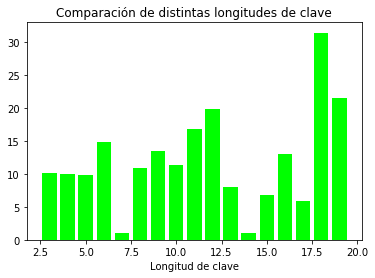

In [27]:
graf_barras(frac)

In [28]:
print(frac[4]) # longitud 7
print(frac[11]) # longitud 14
print(sorted(frac)[2]) # Tercer valor más pequeño, hay bastante diferencia

1.0330121925247575
1.0784626822716812
5.953833994708994


Los candidatos más probables para la longitud de clave con el test Friedman son 7 y 14. Como el 7 es un valor que se repite en ambos test, probaremos con este valor. De hecho, 14 es múltiplo de 7, por lo que tiene sentido que si la clave tiene longitud 7, con 14 obtengamos un cociente cercano a 1.

Con la fórmula de las Kappa, podemos estimar la longitud de la clave prescindiendo del método de Kasiski.
Utilizando en el cálculo de $\kappa_0$ el texto completo.

Esto es una aproximación, generalmente por exceso. Requiere que el texto sea muy largo y la clave corta para que sea precisa.

In [29]:
kappaFrac(IndCo(text)) # En este caso no se acerca mucho a la clave

9.964341858917033

#### Hallamos la clave

In [30]:
# Dividimos el texto en bloques de longitud 7.
keyLen=7
blocks=get_blocks(text,keyLen)
columns=get_columns(blocks)

##### Método del artículo
https://www.researchgate.net/publication/221581427_An_Interactive_Cryptanalysis_Algorithm_for_the_Vigenere_Cipher

Se basa en comparar las frecuencias relativas con las del idioma.
Hay diferencia entre las frecuencias relativas entre inglés y español, pero son similares si comparamos con la frecuencia que presentaría un texto aleatorio, por lo que no necesitamos conocer cuál de los dos lenguajes es a priori.

In [31]:
EN_REL_FREQ = {'A': 0.08167, 'B': 0.01492, 'C': 0.02782, 'D': 0.04253, 'E': 0.12702, 'F': 0.02228, 'G': 0.02015,
               'H': 0.06094, 'I': 0.06966, 'J': 0.00153, 'K': 0.00772, 'L': 0.04025, 'M': 0.02406, 'N': 0.06749,
               'O': 0.07507, 'P': 0.01929, 'Q': 0.00095, 'R': 0.05987, 'S': 0.06327, 'T': 0.09056, 'U': 0.02758,
               'V': 0.00978, 'W': 0.02360, 'X': 0.00150, 'Y': 0.01974, 'Z': 0.00074}

In [32]:
# Desplaza una cadena sumandole la misma cantidad a cada caracter
def shift(text, amount):
    shifted = ''
    letters = string.ascii_uppercase
    for letter in text:
        shifted += letters[(letters.index(letter)+amount) % len(letters)]
    return shifted

In [33]:
# Calcula el índice de coincidencia mutuo
def MIC(s):
    n = len(s)
    F = Counter(list(s))
    return sum([EN_REL_FREQ[c]*F[c] for c in string.ascii_uppercase])/n

In [34]:
# Metemos en un diccionario los MIC de cada columna con cada shifted
mutIndCo={}
for i in range(keyLen):
    for sigma in range(26):
        mutIndCo[(i,sigma)]=MIC(shift(columns[i],sigma))
mutIndCo

{(0, 0): 0.0338986,
 (0, 1): 0.03622446666666667,
 (0, 2): 0.04238366666666666,
 (0, 3): 0.03611046666666667,
 (0, 4): 0.03895613333333332,
 (0, 5): 0.032792133333333334,
 (0, 6): 0.031918600000000005,
 (0, 7): 0.033161333333333334,
 (0, 8): 0.040211266666666655,
 (0, 9): 0.041177666666666675,
 (0, 10): 0.036285399999999995,
 (0, 11): 0.0393304,
 (0, 12): 0.0404108,
 (0, 13): 0.04324566666666667,
 (0, 14): 0.04009186666666668,
 (0, 15): 0.03573226666666667,
 (0, 16): 0.0377198,
 (0, 17): 0.04114573333333333,
 (0, 18): 0.03715886666666667,
 (0, 19): 0.031382933333333335,
 (0, 20): 0.0458984,
 (0, 21): 0.0308954,
 (0, 22): 0.03149420000000001,
 (0, 23): 0.04414006666666667,
 (0, 24): 0.06178473333333333,
 (0, 25): 0.03643913333333333,
 (1, 0): 0.0660501333333333,
 (1, 1): 0.036821799999999995,
 (1, 2): 0.035615266666666666,
 (1, 3): 0.039210600000000005,
 (1, 4): 0.041167,
 (1, 5): 0.034436400000000006,
 (1, 6): 0.034625800000000005,
 (1, 7): 0.035881666666666666,
 (1, 8): 0.030162,
 (1,

In [35]:
# Calculamos el shift con mayor MIC de cada columna
sigma=[]
for i in range(keyLen):
    maximo = mutIndCo[(i,0)]
    sigmax = 0
    for s in range(1,26):
        if mutIndCo[(i,s)] > maximo:
            maximo = mutIndCo[(i,s)]
            sigmax = s
    sigma.append((sigmax)%26)
sigma

[24, 0, 11, 18, 7, 0, 13]

Sumando estos valores al texto cifrado, se obtiene un texto con mayor MIC. Por tanto, parece que el mensaje se ha encriptado la clave "opuesta", es decir, la que obtenemos cambiando el signo a los valores (en módulo 26) y sustituyéndolos por los caracteres correspondientes.

In [36]:
key_val=[-s%26 for s in sigma]
key_val

[2, 0, 15, 8, 19, 0, 13]

In [37]:
# Utilizamos el método que hemos implementado en la clase Vigenère para obtener los caracteres
vig = Vigenere(string.ascii_uppercase)

In [38]:
key = ''.join(list(map(vig.getCharacter, key_val)))
key # Obtenemos la clave

'CAPITAN'

In [39]:
vig.key = key # Desciframos el mensaje utilizando la clave
print(vig.decipher(text))

SENORDIJOELCAPITANNEMOMOSTRANDOMELOSINSTRUMENTOSCOLGADOSDELASPAREDESDESUCAMAROTEHEAQUILOSAPARATOSEXIGIDOSPORLANAVEGACIONDELNAUTILUSALIGUALQUEENELSALONLOSTENGOAQUIBAJOMISOJOSINDICANDOMEMISITUACIONYMIDIRECCIONEXACTASENMEDIODELOCEANOALGUNOSDEELLOSLESONCONOCIDOSCOMOELTERMOMETROQUEMARCALATEMPERATURAINTERIORDELNAUTILUSELBAROMETROQUEPESAELAIREYPREDICELOSCAMBIOSDETIEMPOELHIGROMETROQUEREGISTRAELGRADODESEQUEDADDELAATMOSFERAELSTORMGLASSCUYAMEZCLAALDESCOMPONERSEANUNCIALAINMINENCIADELASTEMPESTADESLABRUJULAQUEDIRIGEMIRUTAELSEXTANTEQUEPORLAALTURADELSOLMEINDICAMILATITUDLOSCRONOMETROSQUEMEPERMITENCALCULARMILONGITUDYPORULTIMOMISANTEOJOSDEDIAYDENOCHEQUEMESIRVENPARAESCRUTARTODOSLOSPUNTOSDELHORIZONTECUANDOELNAUTILUSEMERGEALASUPERFICIEDELASAGUASSONLOSINSTRUMENTOSHABITUALESDELNAVEGANTEYSUUSOMEESCONOCIDOREPUSEPEROHAYOTROSAQUIQUERESPONDENSINDUDAALASPARTICULARESEXIGENCIASDELNAUTILUSESECUADRANTEQUEVEORECORRIDOPORUNAAGUJAINMOVILNOESUNMANOMETROESUNMANOMETROENEFECTOPUESTOENCOMUNICACIONCONELAGUACUYAPRESIONEXTERIORIN

##### Método del libro An Introduction to Mathematical Cryptography
Se basa en comparar las frecuencias relativas entre las columnas, lo que permite conocer el resto de caracteres de la clave a partir de uno dado. Luego, sólo tendremos que probar 26 posibles claves.

In [40]:
# Desplaza una cadena sumandole la misma cantidad a cada caracter
def shift(text, amount):
    shifted = ''
    letters = string.ascii_uppercase
    for letter in text:
        shifted += letters[(letters.index(letter)+amount) % len(letters)]
    return shifted

In [41]:
def corr(a,b): # Correlación de las frecuencas entre dos cadenas
    s=0
    for letter in string.ascii_uppercase:
        s+=a.count(letter)*b.count(letter)
    return s/(len(a)*len(b))

In [42]:
mutIndCo={} # Comparamos cada cadena con el resto, desplazadas con los 26 posibles desplazamientos
for i in range(keyLen):
    for j in range(i+1,keyLen):
        for sigma in range(26):
            mutIndCo[(i,j,sigma)]=corr(columns[i],shift(columns[j],sigma))

In [43]:
mutIndCo

{(0, 1, 0): 0.035111111111111114,
 (0, 1, 1): 0.03693333333333333,
 (0, 1, 2): 0.06848888888888889,
 (0, 1, 3): 0.038622222222222224,
 (0, 1, 4): 0.03546666666666667,
 (0, 1, 5): 0.03475555555555555,
 (0, 1, 6): 0.04391111111111111,
 (0, 1, 7): 0.030355555555555556,
 (0, 1, 8): 0.037333333333333336,
 (0, 1, 9): 0.036444444444444446,
 (0, 1, 10): 0.03542222222222222,
 (0, 1, 11): 0.03746666666666667,
 (0, 1, 12): 0.04351111111111111,
 (0, 1, 13): 0.03986666666666667,
 (0, 1, 14): 0.04008888888888889,
 (0, 1, 15): 0.03528888888888889,
 (0, 1, 16): 0.042977777777777774,
 (0, 1, 17): 0.03902222222222222,
 (0, 1, 18): 0.04195555555555556,
 (0, 1, 19): 0.03244444444444444,
 (0, 1, 20): 0.03591111111111111,
 (0, 1, 21): 0.028844444444444443,
 (0, 1, 22): 0.04208888888888889,
 (0, 1, 23): 0.029955555555555555,
 (0, 1, 24): 0.045733333333333334,
 (0, 1, 25): 0.032,
 (0, 2, 0): 0.03617777777777778,
 (0, 2, 1): 0.04448888888888889,
 (0, 2, 2): 0.037866666666666667,
 (0, 2, 3): 0.03875555555555556

In [44]:
# Nos quedamos los que presentan las correlaciones más altas
mutIndCo_altos=list(filter(lambda x: mutIndCo[x] >= 0.065, mutIndCo))
mutIndCo_altos # Obtenemos cuánto hay que desplazar un carácter en función de otro
# La entrada (i,j,n) siginifica que el carácter j-ésimo de la clave corresponde al i-ésimo desplazado n veces.

[(0, 1, 2),
 (0, 2, 13),
 (0, 3, 20),
 (0, 4, 9),
 (0, 5, 2),
 (0, 6, 15),
 (1, 2, 11),
 (1, 3, 18),
 (1, 4, 7),
 (1, 5, 0),
 (1, 6, 13),
 (2, 3, 7),
 (2, 4, 22),
 (2, 5, 15),
 (2, 6, 2),
 (3, 4, 15),
 (3, 5, 8),
 (3, 6, 21),
 (4, 5, 19),
 (4, 6, 6),
 (5, 6, 13)]

Tenemos un sistema de 7 incógnitas y `len(mutInd_altos)` ecuaciones, pero todas las ecuaciones son redundantes con las 6 primeras. Por tanto las 6 primeras ecuaciones nos permiten obtener los caracteres 2-7 de la clave a partir del primero. Obtenemos una posible clave para cada posible primer carácter (26 posibilidades).

In [45]:
possible_keys=[]
for first in string.ascii_uppercase: # Obtenemos una posible clave para cada primer carácter
    key=first
    # El caracter k-ésimo de la clave se obtiene desplazando el primero una cantidad que calculamos previmente
    for i in mutIndCo_altos[:keyLen-1]:
        key+=shift(first,i[2]) 
    possible_keys.append(key)
possible_keys

['ACNUJCP',
 'BDOVKDQ',
 'CEPWLER',
 'DFQXMFS',
 'EGRYNGT',
 'FHSZOHU',
 'GITAPIV',
 'HJUBQJW',
 'IKVCRKX',
 'JLWDSLY',
 'KMXETMZ',
 'LNYFUNA',
 'MOZGVOB',
 'NPAHWPC',
 'OQBIXQD',
 'PRCJYRE',
 'QSDKZSF',
 'RTELATG',
 'SUFMBUH',
 'TVGNCVI',
 'UWHODWJ',
 'VXIPEXK',
 'WYJQFYL',
 'XZKRGZM',
 'YALSHAN',
 'ZBMTIBO']

Como ocurría anteriormente, estas no son las claves que nos interesan, sino sus "opuestas". 

In [46]:
def inverse_key(key):
    vig=Vigenere(string.ascii_uppercase)
    val=list(map(vig.getValue,list(key)))
    val=[-v%26 for v in val]
    return ''.join(list(map(vig.getCharacter,val)))

In [47]:
possible_keys=list(map(inverse_key,possible_keys))
possible_keys

['AYNGRYL',
 'ZXMFQXK',
 'YWLEPWJ',
 'XVKDOVI',
 'WUJCNUH',
 'VTIBMTG',
 'USHALSF',
 'TRGZKRE',
 'SQFYJQD',
 'RPEXIPC',
 'QODWHOB',
 'PNCVGNA',
 'OMBUFMZ',
 'NLATELY',
 'MKZSDKX',
 'LJYRCJW',
 'KIXQBIV',
 'JHWPAHU',
 'IGVOZGT',
 'HFUNYFS',
 'GETMXER',
 'FDSLWDQ',
 'ECRKVCP',
 'DBQJUBO',
 'CAPITAN',
 'BZOHSZM']

Ahí vemos la clave: CAPITAN

In [48]:
# Posibles mensajes descifrados, el correcto aparece en penúltimo lugar
for key in possible_keys:
    vig=Vigenere(string.ascii_uppercase,key)
    print(key,vig.decipher(text[:50]))

AYNGRYL UGPQTFKLQGNECRKVCPPGOQOQUVTCPFQOGNQUKPUVTWOGPVQUEQ
ZXMFQXK VHQRUGLMRHOFDSLWDQQHPRPRVWUDQGRPHORVLQVWUXPHQWRVFR
YWLEPWJ WIRSVHMNSIPGETMXERRIQSQSWXVERHSQIPSWMRWXVYQIRXSWGS
XVKDOVI XJSTWINOTJQHFUNYFSSJRTRTXYWFSITRJQTXNSXYWZRJSYTXHT
WUJCNUH YKTUXJOPUKRIGVOZGTTKSUSUYZXGTJUSKRUYOTYZXASKTZUYIU
VTIBMTG ZLUVYKPQVLSJHWPAHUULTVTVZAYHUKVTLSVZPUZAYBTLUAVZJV
USHALSF AMVWZLQRWMTKIXQBIVVMUWUWABZIVLWUMTWAQVABZCUMVBWAKW
TRGZKRE BNWXAMRSXNULJYRCJWWNVXVXBCAJWMXVNUXBRWBCADVNWCXBLX
SQFYJQD COXYBNSTYOVMKZSDKXXOWYWYCDBKXNYWOVYCSXCDBEWOXDYCMY
RPEXIPC DPYZCOTUZPWNLATELYYPXZXZDECLYOZXPWZDTYDECFXPYEZDNZ
QODWHOB EQZADPUVAQXOMBUFMZZQYAYAEFDMZPAYQXAEUZEFDGYQZFAEOA
PNCVGNA FRABEQVWBRYPNCVGNAARZBZBFGENAQBZRYBFVAFGEHZRAGBFPB
OMBUFMZ GSBCFRWXCSZQODWHOBBSACACGHFOBRCASZCGWBGHFIASBHCGQC
NLATELY HTCDGSXYDTARPEXIPCCTBDBDHIGPCSDBTADHXCHIGJBTCIDHRD
MKZSDKX IUDEHTYZEUBSQFYJQDDUCECEIJHQDTECUBEIYDIJHKCUDJEISE
LJYRCJW JVEFIUZAFVCTRGZKREEVDFDFJKIREUFDVCFJZEJKILDVEKFJTF
KIXQBIV KWFGJVABGWDUSHALSFFWEGEGKLJSFVGEWDGKAFKLJMEWFLGK

## Experimento con la fórmula de las Kappa

Probamos distintas variantes al índice de coincidencias medio, como son la media geométrica, la armónica y la mediana. Hemos escogido un texto algo más largo y tomaremos una clave algo más corta (logitud 5).

In [49]:
# Fórmula de las Kappa
def kappaFrac_EN(k0):
    return (kp_EN-kr)/(k0-kr)

In [50]:
def encode_uppercase(cadena): # Sin números
    cadena=cadena.upper().replace('Ñ','GN')
    cadena=''.join(normalize(c) for c in cadena if c in string.ascii_uppercase)
    return cadena

In [51]:
t=encode_uppercase(open('sample.txt','r').read())

In [52]:
t

'COPYRIGHTEDSAMPLETEXTPROVIDEDBYTHEPUBLISHERANDUSEDWITHPERMISSIONMAYBEINCOMPLETEORCONTAINOTHERCODINGCHAPTERONEASTOPONTHESALTROUTEBCASTHEYROUNDEDABENDINTHEPATHTHATRANBESIDETHERIVERLARARECOGNIZEDTHESILHOUETTEOFAFIGTREEATOPANEARBYHILLTHEWEATHERWASHOTANDTHEDAYSWERELONGTHEFIGTREEWASINFULLLEAFBUTNOTYETBEARINGFRUITSOONLARASPOTTEDOTHERLANDMARKSANOUTCROPPINGOFLIMESTONEBESIDETHEPATHTHATHADASILHOUETTELIKEAMANSFACEAMARSHYSPOTBESIDETHERIVERWHERETHEWATERFOWLWEREEASILYSTARTLEDATALLTREETHATLOOKEDLIKEAMANWITHHISARMSUPRAISEDTHEYWEREDRAWINGNEARTOTHEPLACEWHERETHEREWASANISLANDINTHERIVERTHEISLANDWASAGOODSPOTTOMAKECAMPTHEYWOULDSLEEPONTHEISLANDTONIGHTLARAHADBEENBACKANDFORTHALONGTHERIVERPATHMANYTIMESINHERSHORTLIFEHERPEOPLEHADNOTCREATEDTHEPATHITHADALWAYSBEENTHERELIKETHERIVERBUTTHEIRDEERSKINSHODFEETANDTHEWOODENWHEELSOFTHEIRHANDCARTSKEPTTHEPATHWELLWORNLARASPEOPLEWERESALTTRADERSANDTHEIRLIVELIHOODTOOKTHEMONACONTINUALJOURNEYATTHEMOUTHOFTHERIVERTHELITTLEGROUPOFHALFADOZENINTERMINGLEDFAMILIESGATHEREDSALTFROMTHEGREATSAL

In [53]:
t_enc=Vigenere(string.ascii_uppercase,keyLen=5).cipher(t)
t_enc

LLLLL


'QIRMLWAJHYRMCAJZYVSRHJTCPWXGRVMNJSJIVNWMVYTOHROUSXKCVVJSLOWMGCQBGOSDSCBWQAJZYVSIFWQBNOCPCNVYTQIRCPUWVURHYFIPSUGNQDIBNJSMOFVFIINGPWOMVVYMLQIHRYFOVSHFWHHBGDUHBVVUHLCBVSMKRYHBGFCJYTZUFUTSWCAPWTSXVVYGCNVIIYVHYCZCTCUNTSYONQDUBYCFVMBKZFHBGKYONJSLKUUVIHUPRNVYFOSGQGFYZIPUNVYHWAHLGSQOMKBZIFNZYOZDINBIVMYHVGOLWHITLICVGICHNOLOMRCNHYFCNVYTZUBXOOLYMCBIINEFIDJKBACZNWGSMVCHSVGGCRYVVYDUVVNVUVVURUUWFVIWSNHYNWESUOOHGZCQYOGCFMVSUDIHVGGCRYVVYFCXSLKBGFYHBGKUHYTTIKFYSLSYCGCZSUHUFNNSXONCZFHLGSNVUVZICEGRFWEGOGOHYWNVBKGUFGUIJFUKGYRNJSSKYTSXFUYWHUHGOLHIVVYDFCQYKBGFYHBGFYKUUOHWMNOHRCPHBSLKJYFNJSCGFCBXKUUOACIFGJCNVCGOEGQUAJVVYMQQIFRMNSYDIPHBSCUZUBXVCHWAJHFOLCVURVGSHPUEYUBXHCLHBCZIBAVVYFCXSLDUVVGOHAHCAYUWHVYTGBCLVZCTYJSLDYQDFSBCRHCNEFYONGRNVYRONVCVVURUNKUMMDSYBNJSLSFKYYHBGFCJYTPOHNJSCFXGSLGEKBMVIFTYSNCBXHBGKICXGBQVYGZMCZVVYWLJOHRWCFNGEGDNHBGDUHBYSFZQQFHZUTOMDYQDFSQGFYGUNHNFUFSLGUPRNVYKFFWPGZCVIQRNCIMHBSGQBUQIPHCBOCZDCOTBYMUVHBSGQINVIHHBSLKJYFNJSFWNVZYULQIJCZJOFTUFCTSHKBNSLOWHUFGRZOGKZCSMIONVYTSXGUNHZFIOHBSATSUHMCZ

En este caso, la logitud del texto respecto a la clave es bastante mayor, por lo que la proximación por esta fórmula es más precisa.

In [54]:
print(IndCo(t_enc))
print(kappaFrac(IndCo(t_enc)))

0.04681644026089877
3.996272169353077


In [55]:
# Calculamos del índice IndCo para distintas longitudes de clave

frac_aritmetica=[]
frac_geometrica=[]
frac_armonica=[]
frac_mediana=[]

for keyLen in range(3,20):
    blocks=get_blocks(t_enc,keyLen)
    columns=get_columns(blocks)
    indco = []
    for i in range(keyLen):
        indco.append(IndCo(columns[i]))
    
    frac_aritmetica.append(kappaFrac(np.mean(indco)))
    frac_geometrica.append(kappaFrac(gmean(indco)))
    frac_armonica.append(kappaFrac(harmonic_mean(indco)))
    frac_mediana.append(kappaFrac(np.median(indco)))

Observamos resultados similares para todos los criterios. A diferencia del ejemplo anterior, una mayor longitud del texto respecto a la clave provoca que los IC sean más similares entre candidatos.

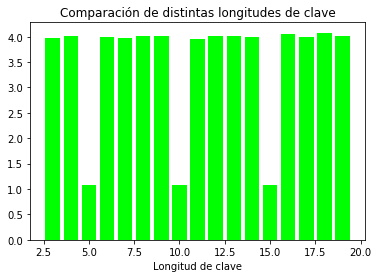

In [56]:
graf_barras(frac_aritmetica)

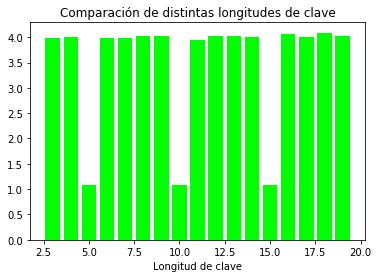

In [57]:
graf_barras(frac_geometrica)

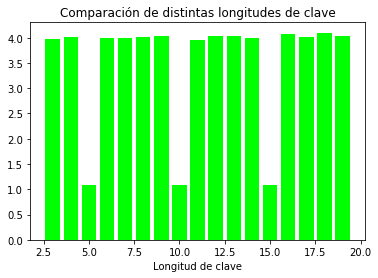

In [58]:
graf_barras(frac_armonica)

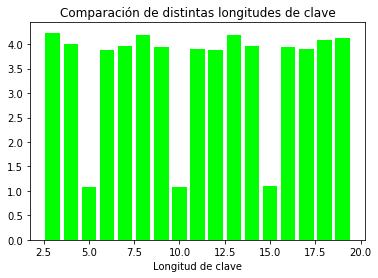

In [59]:
graf_barras(frac_mediana)